<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/Food_Trucks_Prediction_ipynb_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

In [ ]:
!pip install scikit-learn


#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Task 3: Load the Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/food_truck_data.txt')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
#To show and understannd the data (the first 5 rows)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#To show. and understand the data (the last 5 rows)

data.tail(5)

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


##Get Data Info

In [ ]:
#To obtain specific information about the data. The dataset has 97 rows, 2 columns, and the data type is float64.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
#To drop duplicates in thee dataset
data.drop_duplicates(inplace=True)

In [ ]:
#To verify if there were duplicates in the dataset. There was no duplicate.
data.shape

(97, 2)

In [ ]:
#To obtain descriptive. statistics in the dataset. We notice the minimum value in the Profit column is negative (-2.680700). That will be confirmed by visualizations of the dataset.
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##Find Missing Values

#Task 5: Perform Data Cleaning

In [ ]:
#Looking for missing values in the dataset. No missing values found.
data.isnull().sum()

Population    0
Profit        0
dtype: int64

#Task 6: Visualize Cleaned up Dataset

<ipython-input-12-eda2158901fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Population', data=data, palette='RdBu_r')


<Axes: xlabel='Population', ylabel='count'>

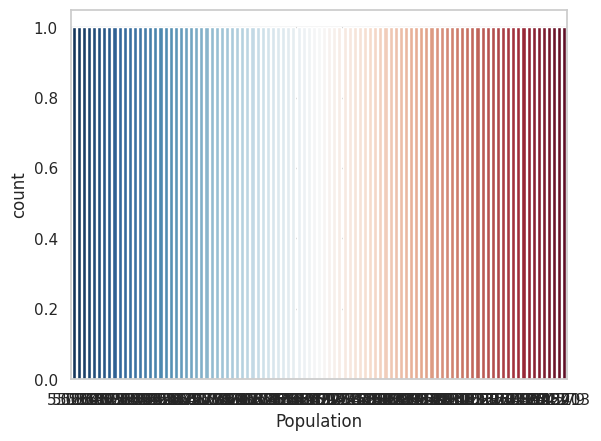

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='Population', data=data, palette='RdBu_r')

<Axes: xlabel='Population', ylabel='Profit'>

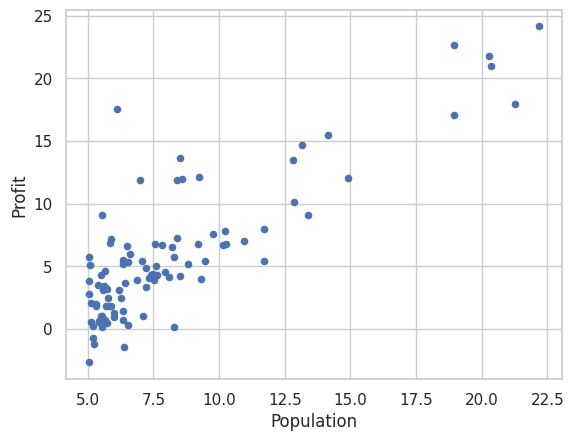

In [ ]:
#A scatter plot of the dataset with Population in the X axis and Profit (the target column) in Y axis. Some points are located in the negative zone regarding thr Profit column(Y axis).
data.plot(kind='scatter', x='Population', y='Profit')

<Axes: ylabel='Frequency'>

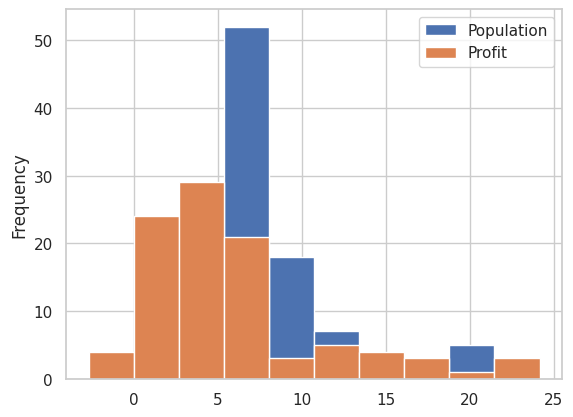

In [ ]:
#A histogram of the entire dataset
data.plot(kind="hist")

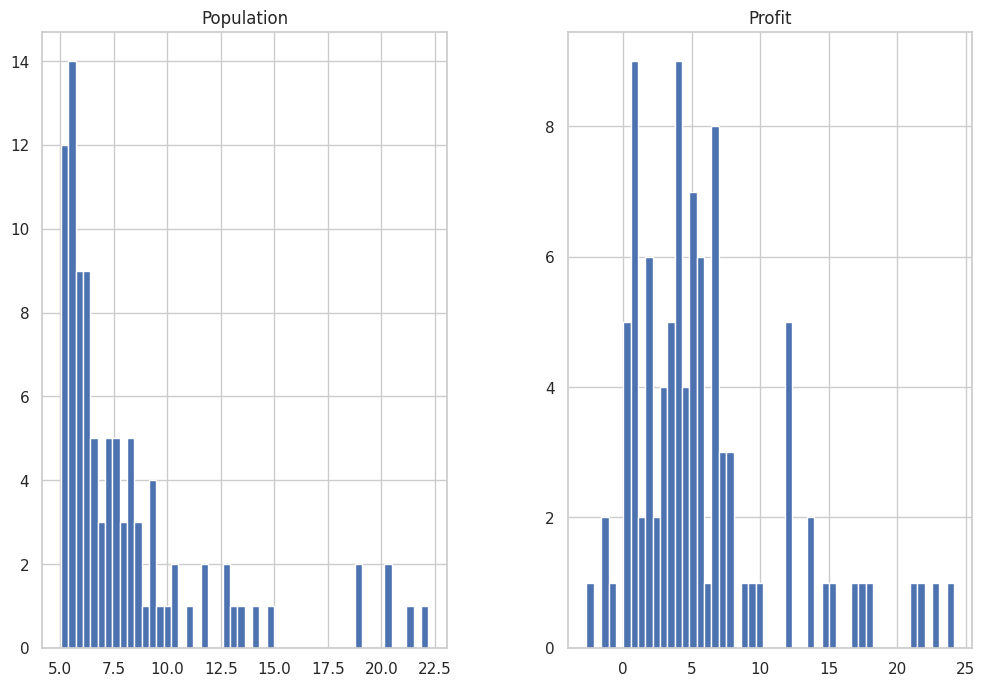

In [ ]:
#A histogram of each column of the dataset
data.hist(bins=50, figsize=(12,8))
plt.show()

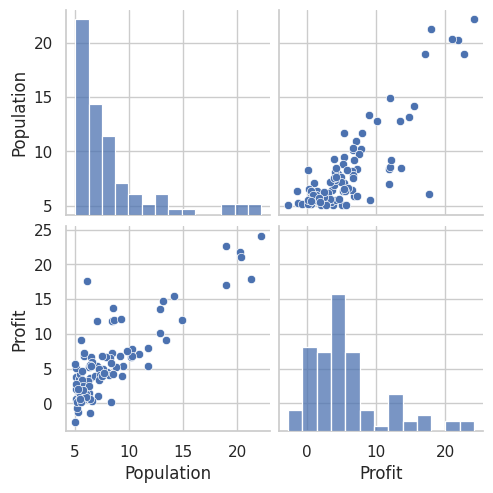

In [ ]:
#Pairplot allows us to see both the distribution andthe relationships between two variables. Our target column is Profit. Generally, it is observed that  profit increases when the population increases.
sns.pairplot(data)

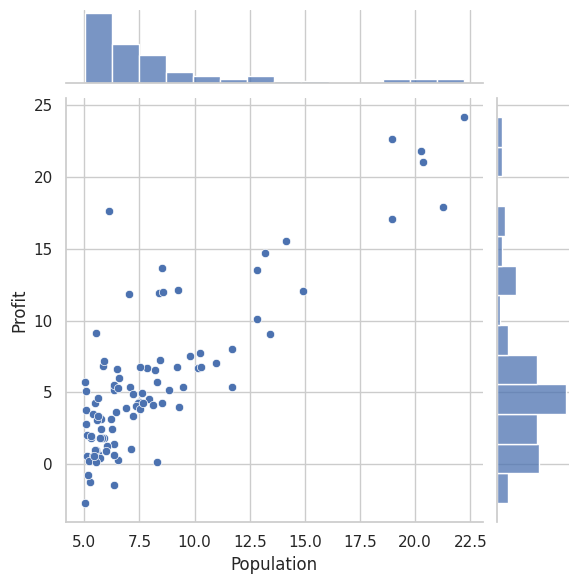

In [ ]:
#A joint plot of population VS profit
sns.jointplot(x='Population', y='Profit', data=data)

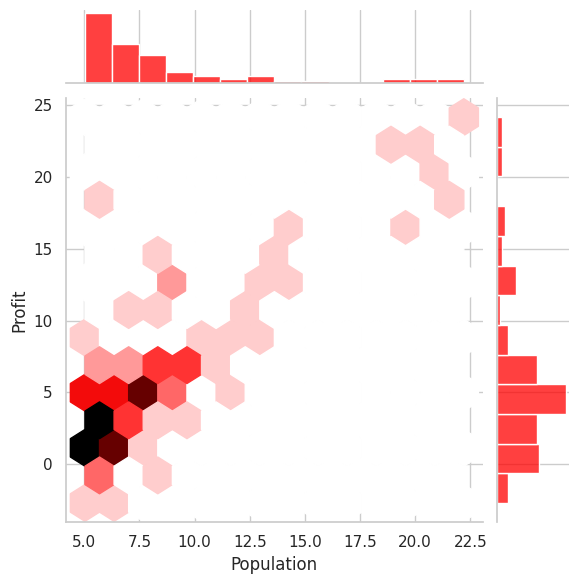

In [ ]:
#Another joint plot of population VS profit
sns.jointplot(x='Population', y='Profit', data=data, kind='hex', color='red')

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [ ]:
x = data['Population'].values
y = data['Profit'].values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
#X = np.array(population).reshape(-1,1)
#y = np.array(profit)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Task 9: Choose the ML Method to follow

In [ ]:
Linear_model = LinearRegression()
Linear_model = LogisticRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()

#Task 10: Train the ML Model

In [ ]:
#The LogisticRegression_model is not suitable for the continuous target variable. The remaining models (Linear Regression, Decision Tree Regressor, and Random Forest Regressor) are appropriate for regression tasks with continuous target values.
# Assuming you intend to use Linear Regression and not Logistic Regression

Linear_model = LinearRegression()


models = [Linear_model, DecisionTree_model, RandomForest_model]


models = [Linear_model, DecisionTree_model, RandomForest_model]
for model in models:
  # Reshape x_train to a 2D array if it's 1D
  if x_train.ndim == 1:
    x_train_reshaped = x_train.reshape(-1, 1)  # Reshape for single feature
  else:
    x_train_reshaped = x_train  # Keep as is if already 2D

  model.fit(x_train_reshaped, y_train)  # Use the reshaped data for training
  print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!


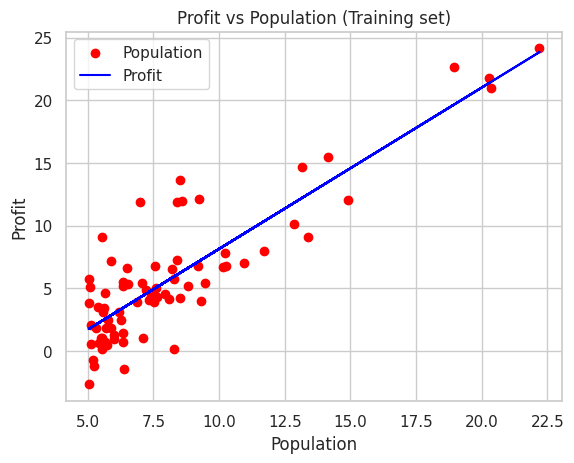

In [ ]:
# Visualize training set
plt.scatter(x_train, y_train, color = "red", label='Population')
plt.title("Profit vs Population (Training set)")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.plot(x_train, Linear_model.predict(x_train.reshape(-1, 1)), color = "blue", label='Profit') # Reshape x_train to a 2D array
plt.legend()
plt.show()

#Task 11: Test the Model

In [ ]:
Accuracy_Linear_model = Linear_model.score(x_test.reshape(-1, 1), y_test)
Accuracy_DecisionTree_model = DecisionTree_model.score(x_test.reshape(-1, 1), y_test)
Accuracy_RandomForest_model = RandomForest_model.score(x_test.reshape(-1, 1), y_test)

In [ ]:
models = [Linear_model, DecisionTree_model, RandomForest_model]
for model in models:
  Accuracy = model.score(x_test.reshape(-1, 1), y_test)
  print(f'Accuracy of {model} is {Accuracy}')

Accuracy of LinearRegression() is 0.5875801201637747
Accuracy of DecisionTreeRegressor() is 0.546860207543374
Accuracy of RandomForestRegressor() is 0.5489785882786684


In [ ]:
#The LinearRegression model has the best accuracy: 0.5875 (round 0.59)

In [ ]:
test_x = np.array([5])
test_x = test_x.reshape(-1, 1)

In [ ]:
test_x[0,0] = 5   # Population -- float

In [ ]:
test_x

array([[5]])

In [ ]:
#models = [Linear_model, DecisionTree_model, RandomForest_model]
#for model in models:
  #prediction = model.predict(test_x)
  #print(f'Prediction for {model} is {prediction}')

In [ ]:
models = [Linear_model, DecisionTree_model, RandomForest_model]
for model in models:
  prediction = model.predict(test_x)
  print(f'The model {model} predicts a profit  of ${round(float(prediction[0]),2)}')

The model LinearRegression() predicts a profit  of $1.71
The model DecisionTreeRegressor() predicts a profit  of $-2.68
The model RandomForestRegressor() predicts a profit  of $0.44


In [ ]:
pickle.dump(Linear_model, open('/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 6/Spring 2024 - Predictive Analytics/Projects/Food Trucks Prediction/model.pkl', 'wb'))

In [ ]:
joblib.dump(Linear_model, 'Linear_model.joblib')

['Linear_model.joblib']

In [ ]:
"""
The pickle library/method takes a number of parameters,
1.  the thing we want to save
2.  the place in which we want to save whatever it is that we want to save
3.  the mode for the method to access the file and place for the save.
"""

'\nThe pickle library/method takes a number of parameters,\n1.  the thing we want to save\n2.  the place in which we want to save whatever it is that we want to save\n3.  the mode for the method to access the file and place for the save.\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reg = joblib.load('Linear_model.joblib')

In [ ]:
prediction = reg.predict(test_x)
Prediction = prediction[0]

In [ ]:
print(Prediction)

1.705246198026951
